# CS 714 Big Data Analytics & Cloud Computing
## Summer 2022 Project 
### Authors: Oluwatosin Ayo and Faiza Siddiqui

### Project Description:
This project explores the relationship between big data and cloud computing, and how organisations can harness the power of these tools to develop data-driven strategies that keeps them competitive and innovative. 

### General Approach
 - #### Source of Big Data
This project will use the Amazon Customer Dataset (a.k.a. Product Reviews), particularly reviews on electronics products. The Amazon Customer Dataset Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. This dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews”.

 - #### Cloud Environment
This project will be developed on the Amazon Web Services (AWS) platform, making use of the following services:
   - Amazon Elastic Compute Cloud (EC2): a web service that provides resizable compute capacity in the cloud.
   - Amazon Simple Storage Service (S3): an object storage built to retrieve any amount of data from aanywhere.
   - Amazon EMR: a cloud big data platform for running large-scale distributed data processing jobs, interactive SQL queries, and machine learning (ML).
  
 - #### Data Analysis Tool - PySpark
The volume of data to be processed exceeds the capacity of a local computer therefore a utilities Engine, Spark Framework, will be used to read the dataset from Amazon’s Simple Storage Service (S3), which is a service offered by Amazon Web Services (AWS), which provides object storage through a web service interface. All ETL processing will be done in the cloud, using the Amazon Web Services. Statistical analysis will be done using PySpark and SQL capabilities bundled with the Spark module. Apache Spark is an open-source, distributed processing system, used to optimize and run fast analytic queries against data. PySpark is an interface for Apache Spark in Python.

#### The end goal is to show how cloud environments enables effecient and effective analysis of Big Data. 

# Part I: Project Setup

In [1]:
from pyspark.sql import SparkSession

VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# create a Spark session
spark = SparkSession \
    .builder \
    .appName("CS714_Project") \
    .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
#sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1. Installing Required Packages

In [4]:
sc.install_pypi_package("pip==22.1.2") #Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository
sc.install_pypi_package("pandas") 
sc.install_pypi_package("seaborn==0.10.0")
sc.install_pypi_package("wordcloud==1.8.1")
sc.install_pypi_package("vaderSentiment")
#sc.install_pypi_package("textblob")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/96/2f/caec18213f6a67852f6997fb0673ae08d2e93d1b81573edb93ba4ef06970/pip-22.1.2-py3-none-any.whl
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1

  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-9.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: /tmp/166035262

## 2. Importing needed libraries

In [5]:
# import libraries
import numpy as np
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.sql import Window
from pyspark.sql import functions as F
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.types import ArrayType, BooleanType, LongType, FloatType, IntegerType, StringType
from pyspark.sql.functions import lit, udf, struct, countDistinct, collect_list, avg, count, col, split, when, desc, explode, asc

import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 3. Data Loading

In [6]:
input_bucket = 's3://amazon-reviews-pds'
input_path = '/parquet/product_category=Electronics/*.parquet'
df2 = spark.read.parquet(input_bucket + input_path)
#file = "/Users/tosin/Desktop/CS714Assignment4/amazon_reviews_us_Mobile_Electronics_v1_00.tsv"
#df2 = spark.read.csv(file, sep='\t', inferSchema=True, header=True)
#df2.show()
print((df2.count(), len(df2.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(3120938, 15)

In [7]:
#df2 = spark.createDataFrame(df.take(100000))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|year|
+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|         US|   52826068|R3SC2T77Y0PSN8|B00FIYDC1W|     822091995|Monster DNA Over-...|          4|            0|          0|   Y|                N|Very nice sound, ...|These headphones ...| 2014-04-09|2014|
|         US|   13676500|R2ONIZ7ICKORQV|B00E19H9U0|     662432872|Tech Armor 30ML G...|          5|            0|          0|   N|                Y|          Five Stars

### Data Cleaning and Preparation

In [9]:
df2.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

### Removing Nulls and Invalid rows from the dataset.
First we wheck if any of the columns are null. The select statement below will return the count of Null, None, NaN of All DataFrame Columns:

In [10]:
# Check if any of the columns are null - function will return the Count of Null, None, NaN of All DataFrame Columns
from pyspark.sql import functions as F

df2.select(*[
    (
        F.count(F.when((F.isnan(c) | F.col(c).isNull()), c)) if t not in ("timestamp", "date")
        else F.count(F.when(F.col(c).isNull(), c))
    ).alias(c)
    for c, t in df2.dtypes if c in df2.columns
]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   marketplace  customer_id  review_id  ...  review_body  review_date  year
0            0            0          0  ...           86            0     0

[1 rows x 15 columns]

### We can see that there are some nulls in the "review_body" column. We will drop this rows and any other empty fields:

In [11]:
df2 = df2.dropna(how='any')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3120848

### Next we will check for duplicate records and drop them:

In [13]:
# Drop duplicates
df2 = df2.drop_duplicates()
df2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3109389

### The total count of records in our dataset went down from 3120938 to 3109389 (11,549 rows less) after filtering out the invalid records and dropping duplicates.

# Part II : Analysis of Customer Reviews for <u><b>Electronics</b></u> Purchased from Amazon.

## 1. EXPLORATORY AND STATISTICAL ANALYSIS
Here, we are going to perform initial investigations on our dataset so as to discover patterns, spot anomalies, and to check assumptions using summary statistics and graphical representations.

### Descriptive statistics of Dataset

In [14]:
df2.select('customer_id', 'product_parent', 'star_rating', 'helpful_votes', 'total_votes').summary().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  summary           customer_id  ...       helpful_votes         total_votes
0   count               3109389  ...             3109389             3109389
1    mean  2.8802304414579198E7  ...   1.863109118865475  2.3769248556549214
2  stddev  1.5416721423616555E7  ...  21.292830996307465  22.453209493775525
3     min              10000013  ...                   0                   0
4     25%           1.5063897E7  ...                   0                   0
5     50%           2.8108402E7  ...                   0                   0
6     75%           4.3259527E7  ...                   1                   1
7     max               9999987  ...               12786               12944

[8 rows x 6 columns]

#### Our cleaned dataset has 3,109,389 records.

### Analysing Product Reviews

##### Here we create a Dataframe of only the product_reviews column, grouped by 'product_id'.

In [15]:
product_reviews = df2.groupBy("product_id").count().withColumnRenamed("count","product_reviews")
product_reviews.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------------+
|product_id|product_reviews|
+----------+---------------+
|B0046YNVV6|              6|
|B0009EXVFI|             79|
|B001G8A8AM|             63|
|B002ZFJ0DQ|             51|
|B0002LEMWE|            106|
|B00AO49S0U|             14|
|B00009960H|             24|
|B00T9TV2AK|             31|
|B000MND6GK|             61|
|B002VFVQWS|            238|
|B0035A6AUG|            143|
|B0084P6L24|             10|
|B008H55MZ8|              3|
|B0000UV0IQ|             41|
|B0013AG3DY|             89|
|B00MXDTXK0|             23|
|B002C7NC7C|             12|
|B0087EBXKW|              9|
|B00HMDQ4RQ|             49|
|B00170DE0A|              4|
+----------+---------------+
only showing top 20 rows

#### Descriptive statistics of Product Reviews
How many unique categories are represented in this dataset?

In [16]:
product_reviews.select('product_reviews').summary().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  summary     product_reviews
0   count              186254
1    mean  16.694347503946226
2  stddev  113.73566828165913
3     min                   1
4     25%                   1
5     50%                   2
6     75%                   6
7     max               15348

##### There are 186,254 unique products in our dataset.

#### Top 20 Highest-Reviewed Products
##### To see the highest reviewed products, We will sort the dataset in order of reviews per product, with the highest records on top:

In [17]:
top_20 = product_reviews.sort(desc('count')).limit(20).toPandas()
top_20

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    product_id  product_reviews
0   B003L1ZYYM            15348
1   B0002L5R78            11168
2   B003EM8008             9780
3   B0012S4APK             9364
4   B0001FTVEK             8798
5   B000WYVBR0             7845
6   B0019EHU8G             7586
7   B00F5NE2KG             6704
8   B004QK7HI8             6539
9   B00D5Q75RC             6075
10  B00316263Y             5816
11  B0052SCU8U             5763
12  B001GTT0VO             5587
13  B002MAPT7U             5297
14  B003WGRUQQ             5073
15  B008KVUAGU             5022
16  B001TH7GSW             4872
17  B009OBCAW2             4775
18  B004HHICKC             4218
19  B004LTEUDO             4003

#### Bar Chart of most reviewed products
Using the dataframe created in the previous step, we can plot a graph of the top 20 most reviewed products:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

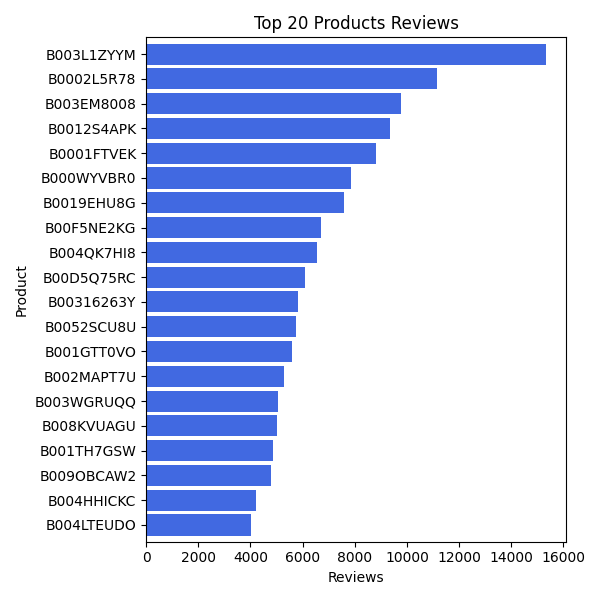

In [18]:
ax = top_20.plot(kind='barh', x='product_id', y='product_reviews', 
            figsize=(6, 6), color='royalblue', zorder=2, width=0.85)

ax.invert_yaxis()
ax.set_xlabel("Reviews")
ax.set_ylabel("Product")
ax.set_title("Top 20 Products Reviews")
ax.get_legend().remove()

plt.tight_layout()
%matplot plt

### Top Most Reviewed Product

In [19]:
top_20.head(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   product_id  product_reviews
0  B003L1ZYYM            15348

### Positive Product Reviews
We will define positive reviews as reviews whose rating is greater than 4, on a scale of 1 - 5:

In [20]:
top_positive_reviews = df2.filter("star_rating >= 4")
print("The number of reviews exceeding 4 stars are %d." % top_positive_reviews.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The number of reviews exceeding 4 stars are 2330034.

### Top 20 Products with the most Positive Reviews
We will display only the top 20 products that has highests positive reviews:

In [21]:
highest_positives = df2.filter("star_rating >=4").groupBy("product_id", "product_title") \
                   .count().withColumnRenamed("count","positive_reviews") \
                   .sort("positive_reviews",ascending=False)
highest_positives.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+----------------+
|product_id|       product_title|positive_reviews|
+----------+--------------------+----------------+
|B003L1ZYYM|AmazonBasics High...|           14452|
|B0002L5R78|High Speed HDMI C...|            9690|
|B003EM8008|Panasonic ErgoFit...|            8185|
|B0012S4APK|Cheetah APTMM2B T...|            8054|
|B0019EHU8G|Mediabridge ULTRA...|            7178|
|B000WYVBR0|VideoSecu ML531BE...|            7141|
|B0001FTVEK|Sennheiser On-Ear...|            6642|
|B00D5Q75RC|Bose SoundLink Mi...|            5673|
|B0052SCU8U|AmazonBasics High...|            5552|
|B00316263Y|BlueRigger Basic ...|            5493|
|B00F5NE2KG|Bluetooth Speaker...|            5447|
|B001GTT0VO|Cheetah Mounts AL...|            5007|
|B004QK7HI8|Mohu Leaf 30 TV A...|            4892|
|B001TH7GSW|AmazonBasics Digi...|            4474|
|B003WGRUQQ|Electrohome EAAC6...|            4082|
|B009OBCAW2|HomeSpot NFC-Enab...|            3853|
|B004LTEUDO|Mediabridge 3.5mm..

### Neutral Product Reviews
We will define neutral reviews as reviews whose rating equals 3, on a scale of 1 - 5:

In [22]:
top_neutral_reviews = df2.filter("star_rating == 3")
print("The number of reviews with 3 stars are %d." % top_neutral_reviews.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The number of reviews with 3 stars are 239971.

### Top 20 Products with the most Neutral Reviews
We will display only the top 10 products that has highest neutral reviews:

In [23]:
highest_neutrals = df2.filter("star_rating == 3").groupBy("product_id", "product_title") \
                   .count().withColumnRenamed("count","neutral_reviews") \
                   .sort("neutral_reviews",ascending=False)
highest_neutrals.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+---------------+
|product_id|       product_title|neutral_reviews|
+----------+--------------------+---------------+
|B0001FTVEK|Sennheiser On-Ear...|            724|
|B003EM8008|Panasonic ErgoFit...|            707|
|B004QK7HI8|Mohu Leaf 30 TV A...|            646|
|B00F5NE2KG|Bluetooth Speaker...|            643|
|B0012S4APK|Cheetah APTMM2B T...|            617|
|B008KVUAGU|Mediasonic Homewo...|            615|
|B0002L5R78|High Speed HDMI C...|            481|
|B002MAPT7U|Clip Plus 4 GB MP...|            433|
|B000IG66VS|JLab JBuds Hi-Fi ...|            427|
|B003WGRUQQ|Electrohome EAAC6...|            425|
|B0038W0K2K|MEElectronics Spo...|            413|
|B003L1ZYYM|AmazonBasics High...|            383|
|B00B46XUQU|PORTTA Auto-Switc...|            378|
|B004OVECU0|Logitech Harmony ...|            359|
|B009OBCAW2|HomeSpot NFC-Enab...|            344|
|B001EZYMF4|Sennheiser CX 300...|            343|
|B00APPDX86|Mohu Leaf 50 TV A...|            329|


### Negative Product Reviews
We will define negative reviews as reviews whose rating is less than or equal to 2, on a scale of 1 - 5:

In [24]:
top_negative_reviews = df2.filter("star_rating <= 2")
print("The number of reviews less than 3 stars are %d." % top_negative_reviews.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The number of reviews less than 3 stars are 539384.

### Top 20 Products with the most Negative Reviews
We will display only the top 20 products that has highest number of negative reviews:

In [25]:
highest_neutrals = df2.filter("star_rating <=2").groupBy("product_id", "product_title") \
                   .count().withColumnRenamed("count","negative_reviews") \
                   .sort("negative_reviews",ascending=False)
highest_neutrals.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+----------------+
|product_id|       product_title|negative_reviews|
+----------+--------------------+----------------+
|B008KVUAGU|Mediasonic Homewo...|            1493|
|B0001FTVEK|Sennheiser On-Ear...|            1432|
|B002MAPT7U|Clip Plus 4 GB MP...|            1291|
|B00B46XUQU|PORTTA Auto-Switc...|            1118|
|B004QK7HI8|Mohu Leaf 30 TV A...|            1001|
|B0002L5R78|High Speed HDMI C...|             997|
|B0030AZ44O|         ZAZUS002577|             891|
|B003EM8008|Panasonic ErgoFit...|             888|
|B000IG66VS|JLab JBuds Hi-Fi ...|             876|
|B0018DQYQ2|C&E HDMI Supports 3D|             801|
|B0038W0K2K|MEElectronics Spo...|             742|
|B008GVOVK0|Fosmon 3-Port HDM...|             732|
|B004OVECU0|Logitech Harmony ...|             724|
|B00APPDX86|Mohu Leaf 50 TV A...|             715|
|B0012S4APK|Cheetah APTMM2B T...|             693|
|B002MAPS6W|Clip Plus 4 GB MP...|             638|
|B00F5NE2KG|Bluetooth Speaker..

### Average Product Ratings
We will aggregate the star_rating column to get a dataframe that displays average ratings per product. We will then plot a graph of the distribution.

In [26]:
product_avg_reviews = df2.where(col("review_body").isNotNull()).groupby(df2.product_id).agg(avg(col("star_rating")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
product_avg_reviews.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------------------+
|product_id|  avg(star_rating)|
+----------+------------------+
|B000MND6GK| 4.655737704918033|
|B0009EXVFI| 4.075949367088608|
|B002ZFJ0DQ|3.7058823529411766|
|B00T9TV2AK| 4.096774193548387|
|B0035A6AUG| 4.566433566433567|
+----------+------------------+
only showing top 5 rows

In [28]:
product_avg_reviews = product_avg_reviews.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

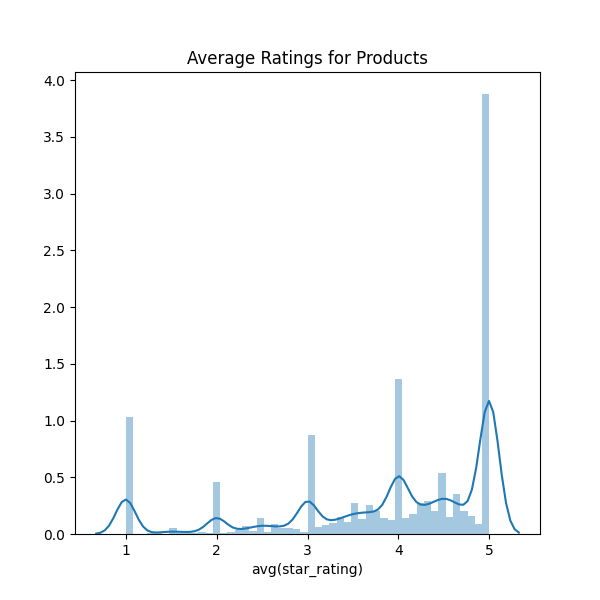

In [29]:
plt.figure(figsize=(6,6))
ax = sns.distplot(product_avg_reviews["avg(star_rating)"])
ax.set_xlabel('avg(star_rating)')
plt.title("Average Ratings for Products")
#plt.show()
%matplot plt

### Visualizing the Distribution of Ratings (from 1-5)

In [30]:
# Removing invalid star ratings out of our dataset 
df2 = df2.filter(F.col("star_rating").cast("int").isNotNull()) 

ratings_df = df2.groupBy("star_rating").count().withColumnRenamed("count","num_ratings")
ratings_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------+
|star_rating|num_ratings|
+-----------+-----------+
|          1|     359381|
|          3|     239971|
|          4|     540141|
|          5|    1789893|
|          2|     180003|
+-----------+-----------+

#### Bar Plot of ratings distribution:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

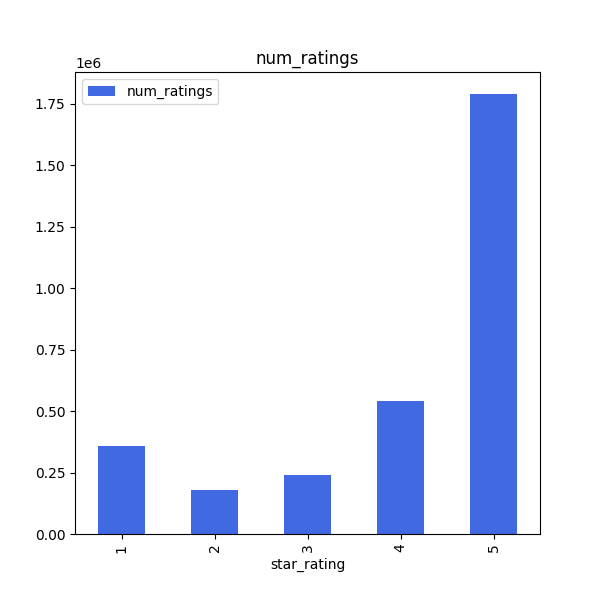

In [31]:
ratings_plot = pd.DataFrame(ratings_df.collect())
ratings_plot.columns = ['star_rating','num_ratings']
ratings_plot.sort_values(by=['star_rating'], inplace=True)
ratings_plot.plot(kind='bar',x='star_rating',y='num_ratings',color='royalblue', subplots='true',figsize=(6,6))
plt.show()
%matplot plt

#### Pie Chart of ratings distribution

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

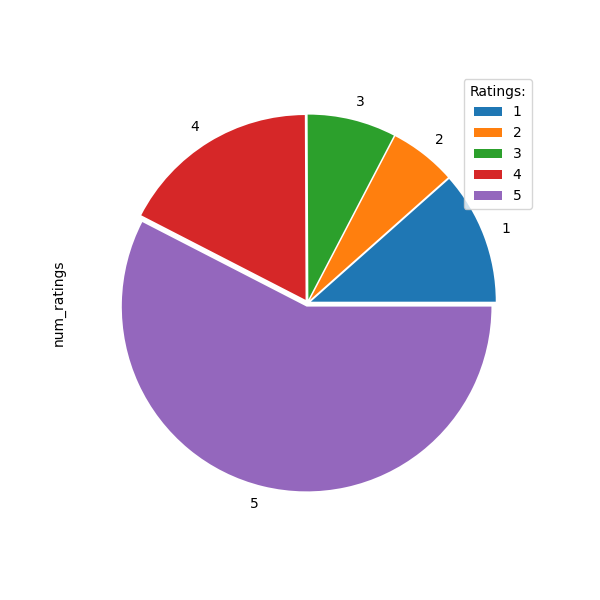

In [32]:
explode = [0.02, 0.02, 0.02, 0.02,0.02]
colors_ = ["royalblue", "darkorange", "#4CAF50", "mediumvioletred", "blueviolet"]
ratings_plot.plot.pie( x='star_rating', y='num_ratings', labels=ratings_plot['star_rating'],explode = explode, figsize=(6,6))
plt.legend(title = "Ratings:")
plt.show()
%matplot plt

#### From the table and the graphs above, we can see that most of the reviews for electronic products are positive.

### Number of Reviews Per Customer

In [33]:
# Create the costumer_reviews DataFrame
customer_reviews = df2.groupBy('customer_id').count().withColumnRenamed("count", "customer_reviews").cache()
customer_reviews.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        customer_id  customer_reviews
0          22428140                 1
1           9993871                 1
2           2832765                 1
3          34039681                 4
4          22433446                 1
...             ...               ...
2169542     1000800                 1
2169543    21336868                 1
2169544    20464632                 1
2169545    47171846                 1
2169546    40410191                 1

[2169547 rows x 2 columns]

### Top 20 Customers with the most Reviews

In [34]:
top_customer_20 = customer_reviews.sort(desc('count')).limit(20).toPandas()
top_customer_20

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   customer_id  customer_reviews
0     49266466               234
1     53075795               200
2     30669680               190
3     53037408               180
4     50820654               171
5     52938899               166
6     50027179               159
7     44834233               159
8     39789300               154
9     32038204               149
10    53090839               140
11    52340667               135
12    51346302               132
13    50530418               132
14    52870270               118
15    12200139               117
16    52643790               113
17    52460215               112
18    51812418               112
19    50529300               107

#### Bar Chart of Top 20 Customers with Most Reviews.
Using the dataframe created in the previous step, we can plot a graph of the top 20 Customers with Most Reviews:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

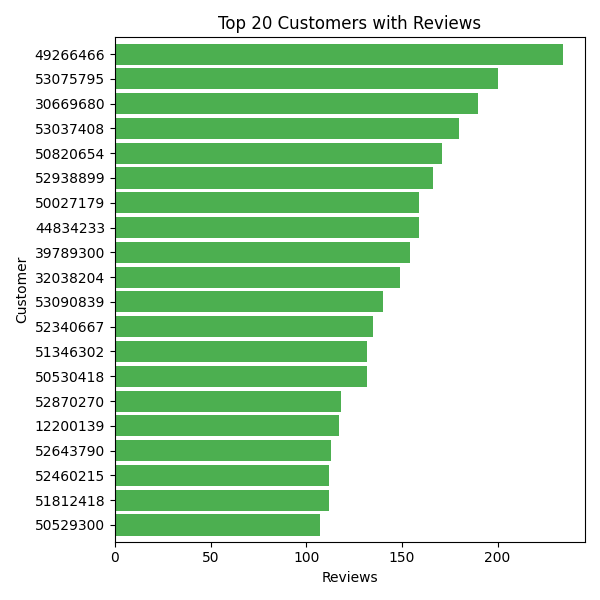

In [35]:
ax = top_customer_20.plot(kind='barh', x='customer_id', y='customer_reviews', 
            figsize=(6, 6), color='#4CAF50', zorder=2, width=0.85)

ax.invert_yaxis()
ax.set_xlabel("Reviews")
ax.set_ylabel("Customer")
ax.set_title("Top 20 Customers with Reviews")
ax.get_legend().remove()

plt.tight_layout()
%matplot plt

### Most Influential Customer
The most influential customer is the customer that has the most reviews accredited to them.

In [36]:
top_customer_20.head(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  customer_id  customer_reviews
0    49266466               234

# 2. SENTIMENT ANALYSIS

Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause. It aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

Sentiment Analysis can help businesses monitor popularity of certain brands, products or even categories, which can improve customer experience as well as Amazon's market research team.

### VADER Sentiment Analysis
We will implement the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis model. VADER pretrained model is used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.  

#### Why VADER?
We settled on VADER above other pre-trained language models because we will be work on complete sentences, as opposed to  two-word combinations, or bigrams.

### Product Review Tags
VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
 - negative
 - neutral
 - positive
 - compound (computed by normalizing the scores above)
 
We will use'pos', 'neu' and'neg' as the tags to represent the 3 catergories the product reviews fall into. The analyser will attempt to predict the tone of a review. 

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True
[nltk_data] Downloading package punkt to /var/lib/livy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /var/lib/livy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

In [38]:
from nltk.corpus import stopwords

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
vader = SentimentIntensityAnalyzer()
a = 'This is just a test. I do not like pizza.'
vader.polarity_scores(a)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.2755}

In [41]:
review_bodies = df2.select("product_id","review_body","star_rating") \
                .filter("review_body IS NOT NULL").take(25000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
review_bodies_df = spark.createDataFrame(review_bodies)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
#review_bodies_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### We will get the polarity scores dictionary and then extract compound scores from the list. We have written soome functions to derive the appropriate labels from the compound score. The 'sentiment_score' column will be used to perform model accuracy test. The reviews in this method will be classified into negative, positive and, neutral ratio.

In [46]:
# VADER sentiment analysis tool for getting polarity scores. We will extract the compound.
def compound_score(sentence):
    vader = SentimentIntensityAnalyzer()
    vader_scores = vader.polarity_scores(sentence)
   
    compound = vader_scores['compound']
    return compound

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
def get_score(compound):
    
    if compound >= 0.5:
        return 'pos'
    elif (compound > -0.5) and (compound < 0.5):
        return 'neu'
    elif compound <= -0.5:
        return 'neg'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
def conf_matrix(x):
    if x[6] == 1 and x[7] == 1:
        return 'TP'
    elif x[6] == 1 and x[7] == -1:
        return 'FN'
    elif x[6] == -1 and x[7] == 1:
        return 'FP'
    elif x[6] == -1 and x[7] == -1:
        return 'TN'
    else:
        return 0   

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### In order to use Python User Defined Functions (UDF) in our PySpark environment, we need to convert the functions to PySpark.

In [47]:
#We convert python UDF functions to PySpark so we can use it in PySpark code.
udf_vader_compound = udf(lambda x: compound_score(x), StringType())
udf_get_sentiment = udf(lambda x:get_score(x),StringType() )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### We use the 'withColumn' function in Spark to add in new columns to our dataframe. We will be adding in the following new columns:
 - compound: This is aggregate of the vader polarity scores. The compound score will be used to measure the sentiment of our reviews.
 - sentiment: This is the predicted sentiment attached to each review. It is either pos, neu or neg.
 - label: We convert the ratings into labels (1, -1) so that the VADER model can accurately make predictions.
   - 1 for positive (ratings 3 and higher)
   - -1 for negative (ratings 2 or less)
 - prediction: This column holds the predcition returned by our analysis model.
 - accuracy: We calculate the accuracy of our predictions and store in the 'accuracy' column.

In [48]:
review_bodies_df = review_bodies_df.withColumn("compound",udf_vader_compound(col("review_body")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
review_bodies_df = review_bodies_df.withColumn("sentiment",udf_get_sentiment(col("compound")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
review_bodies_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-----------+--------+---------+
|product_id|         review_body|star_rating|compound|sentiment|
+----------+--------------------+-----------+--------+---------+
|B007P5V5VQ|I was using an in...|          4|  0.7629|      pos|
|B00DN50YMS|Scuffed up on the...|          1|  0.6696|      pos|
|B004WODP20|My son Mikey goes...|          5|  0.7003|      pos|
|B00179DA46|Updating my origi...|          1|  0.0346|      neu|
|B002RURFGS|My Maxtor hard dr...|          4|  -0.886|      neg|
|B0070UFMOW|I purchased this ...|          4|  0.0232|      neu|
|B001TK3E80|The Aim 8 Three's...|          5|  0.8176|      pos|
|B00BVUBS36|- Totally waterpr...|          5|  0.8768|      pos|
|B004RE3YVM|For the price, yo...|          5|   0.903|      pos|
|B002WPAU38|I ordered this pr...|          5|  0.9476|      pos|
|B003HKQFCC|What does amazon ...|          1|  0.5423|      pos|
|B000LGGCWS|When I first saw ...|          4|  0.9843|      pos|
|B0080R95XI|We were plann

In [51]:
review_bodies_df = review_bodies_df.withColumn('label', F.when(F.col('star_rating') >= 3, 1).otherwise(-1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
review_bodies_df = review_bodies_df.withColumn('prediction', F.when((F.col('compound').cast('double')) >= 0, 1).otherwise(-1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
review_bodies_df.show(50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------------------------+-----------+--------+---------+-----+----------+
|product_id|                          review_body|star_rating|compound|sentiment|label|prediction|
+----------+-------------------------------------+-----------+--------+---------+-----+----------+
|B007P5V5VQ|                 I was using an in...|          4|  0.7629|      pos|    1|         1|
|B00DN50YMS|                 Scuffed up on the...|          1|  0.6696|      pos|   -1|         1|
|B004WODP20|                 My son Mikey goes...|          5|  0.7003|      pos|    1|         1|
|B00179DA46|                 Updating my origi...|          1|  0.0346|      neu|   -1|         1|
|B002RURFGS|                 My Maxtor hard dr...|          4|  -0.886|      neg|    1|        -1|
|B0070UFMOW|                 I purchased this ...|          4|  0.0232|      neu|    1|         1|
|B001TK3E80|                 The Aim 8 Three's...|          5|  0.8176|      pos|    1|         1|
|B00BVUBS3

In [54]:
#get the prediction
review_bodies_df = review_bodies_df.withColumn('accuracy', F.when(F.col('label') == F.col('prediction'), 1).otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
review_bodies_df.show(50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------------------------+-----------+--------+---------+-----+----------+--------+
|product_id|                          review_body|star_rating|compound|sentiment|label|prediction|accuracy|
+----------+-------------------------------------+-----------+--------+---------+-----+----------+--------+
|B007P5V5VQ|                 I was using an in...|          4|  0.7629|      pos|    1|         1|       1|
|B00DN50YMS|                 Scuffed up on the...|          1|  0.6696|      pos|   -1|         1|       0|
|B004WODP20|                 My son Mikey goes...|          5|  0.7003|      pos|    1|         1|       1|
|B00179DA46|                 Updating my origi...|          1|  0.0346|      neu|   -1|         1|       0|
|B002RURFGS|                 My Maxtor hard dr...|          4|  -0.886|      neg|    1|        -1|       0|
|B0070UFMOW|                 I purchased this ...|          4|  0.0232|      neu|    1|         1|       1|
|B001TK3E80|                

In [56]:
review_bodies_df = review_bodies_df.withColumn(
    'conf_matrix',
    when((col("label") == 1) & (col("prediction") == 1), lit("TP")) \
    .when((col("label") == 1) & (col("prediction") == -1), lit("FN")) \
    .when((col("label") == -1) & (col("prediction") == 1), lit("FP")) \
    .when((col("label") == -1) & (col("prediction") == -1), lit("TN")) \
    .otherwise(0))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
review_bodies_df.show(50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------------------------+-----------+--------+---------+-----+----------+--------+-----------+
|product_id|                          review_body|star_rating|compound|sentiment|label|prediction|accuracy|conf_matrix|
+----------+-------------------------------------+-----------+--------+---------+-----+----------+--------+-----------+
|B007P5V5VQ|                 I was using an in...|          4|  0.7629|      pos|    1|         1|       1|         TP|
|B00DN50YMS|                 Scuffed up on the...|          1|  0.6696|      pos|   -1|         1|       0|         FP|
|B004WODP20|                 My son Mikey goes...|          5|  0.7003|      pos|    1|         1|       1|         TP|
|B00179DA46|                 Updating my origi...|          1|  0.0346|      neu|   -1|         1|       0|         FP|
|B002RURFGS|                 My Maxtor hard dr...|          4|  -0.886|      neg|    1|        -1|       0|         FN|
|B0070UFMOW|                 I purchased

## Calculate VADER Model Accuracy
#### Calculating Accuracy, Recall, Precision, and F1 Score:
To see how well our VADER model performed, we will manually calculate the Accuracy, Recall, Precision, and F1 Score using the information in the above table:

In [63]:
#We will get the count of each value in our confusion matrix column
TP = review_bodies_df.filter(col("conf_matrix") == "TP").count()
TN = review_bodies_df.filter(col("conf_matrix") == "TN").count()
FP = review_bodies_df.filter(col("conf_matrix") == "FP").count()
FN = review_bodies_df.filter(col("conf_matrix") == "TP").count()
print(TP, TN, FP, FN)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

19126 2207 2153 19126

In [64]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2*precision*recall / (precision + recall)
print('***  Accuracy: ', round(100 * accuracy, 2),'%',
      '\n*** Precision: ', round(100 * precision, 2),'%',
      '\ *** nRecall: ', round(100 * recall, 2),'%',
      '\n*** F1 Score: ', round(100 * f1_score, 2),'%')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

***  Accuracy:  50.06 % 
*** Precision:  89.88 % \ *** nRecall:  50.0 % 
*** F1 Score:  64.26 %

### Our model yielded an accuracy of 50% on the subset of our dataset that it predicted. This is not bad, given that our model was note trained, customised or tuned at all.

## Correlation Matrix

As an after-thought, we checked the colinearity between the variables that the VADER model used for prediction, to predict sentiements seeing as a subset of the dataset was used for the sentiment analysis.

In [58]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
Variables_corr= ['label', 'prediction', 'accuracy']

assembler = VectorAssembler(inputCols=Variables_corr, outputCol="features")

output = assembler.transform(review_bodies_df)
corr = Correlation.corr(output, "features").collect()[0][0]

corrmatrix = corr.toArray().tolist()
print(corrmatrix)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[1.0, 0.4614450423303288, 0.4509576979657077], [0.4614450423303288, 1.0, 0.30755294617020373], [0.4509576979657077, 0.30755294617020373, 1.0]]

In [60]:
corr_df = spark.createDataFrame(corrmatrix,Variables_corr)
corr_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-------------------+-------------------+
|             label|         prediction|           accuracy|
+------------------+-------------------+-------------------+
|               1.0| 0.4614450423303288| 0.4509576979657077|
|0.4614450423303288|                1.0|0.30755294617020373|
|0.4509576979657077|0.30755294617020373|                1.0|
+------------------+-------------------+-------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

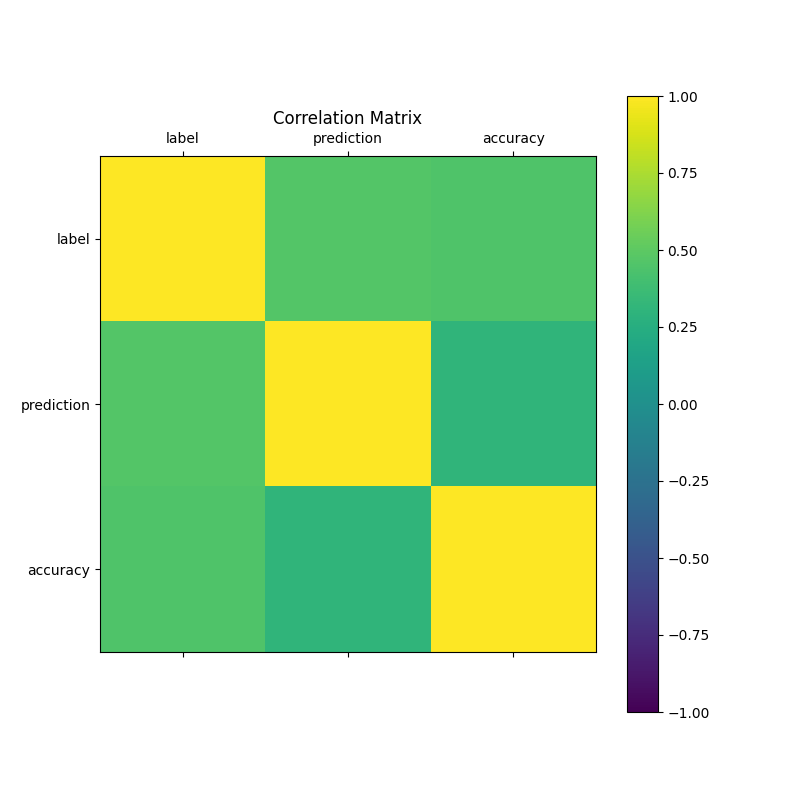

In [61]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111)
ax.set_title("Correlation Matrix")
ax.set_xticklabels(['']+Variables_corr)
ax.set_yticklabels(['']+Variables_corr)
cax=ax.matshow(corrmatrix,vmax=1,vmin=-1)
fig.colorbar(cax)
plt.show()
%matplot plt

#### The result from the Correlation table and the Heatmap shows that the variables were not highly correlated, so we can rule out any issue of overfitting or underfitting.

In [62]:
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# 3. WORD CLOUDS
WordClouds are a great way to visualise most featured keywords from a database. Here, using the 'pos' and 'neg' tags for every review, we are able to tokenise every word of the review and pick out keywords.

The NLTK package comes in handy, with some in-built modules like 'stopwords' and 'word_tokenize' to pick out keywords. While there are a few ways to create Word Clouds, for this project we will be using the Frequency of Words in our corpus to create our cloud.

In [65]:
# create a table of rows that are tagged positive
pos = review_bodies_df.limit(10000).filter(review_bodies_df.sentiment == "pos").select('review_body')
pos = pos.collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
# create a table of rows that are tagged negative
neg = review_bodies_df.limit(10000).filter(review_bodies_df.sentiment == "neg").select('review_body')
neg = neg.collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
# create a table of rows that are tagged neutral
neu = review_bodies_df.limit(10000).filter(review_bodies_df.sentiment == "neu").select('review_body')
neu = neu.collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Next, we create a function that takes in a list, finds the review_body from the list and obtains keywords from the review_body.

In [69]:
# create a function that tokenises words
def create_word_cloud_keywords(row):
    words_tokenised = ''
    for val in row:
        # grab the word from selected column
        text = val[0].lower()
        # clear other punctuations except .
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        # append selected keywords to words_tokenised
        for words in tokens:
            words_tokenised = words_tokenised + words + ' '
    return words_tokenised

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### We will now plot a WordCloud using python's built-in 'wordcloud' package and calling the <i>generate</i> method which takes in tokens and outputs an image featuring the most used keywords.

In [70]:
from wordcloud import WordCloud
import string

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
#generate word cloud for reviews tagged as postive and negative 
pos_wordcloud = WordCloud(width=900, height=500, background_color ='white').generate(create_word_cloud_keywords(pos))
neg_wordcloud = WordCloud(width=900, height=500, background_color ='white').generate(create_word_cloud_keywords(neg))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
#generate word cloud for reviews tagged as neutral
neu_wordcloud = WordCloud(width=900, height=500, background_color ='white').generate(create_word_cloud_keywords(neu))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [73]:
#sc.stop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Wordcloud for POSITIVE words:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

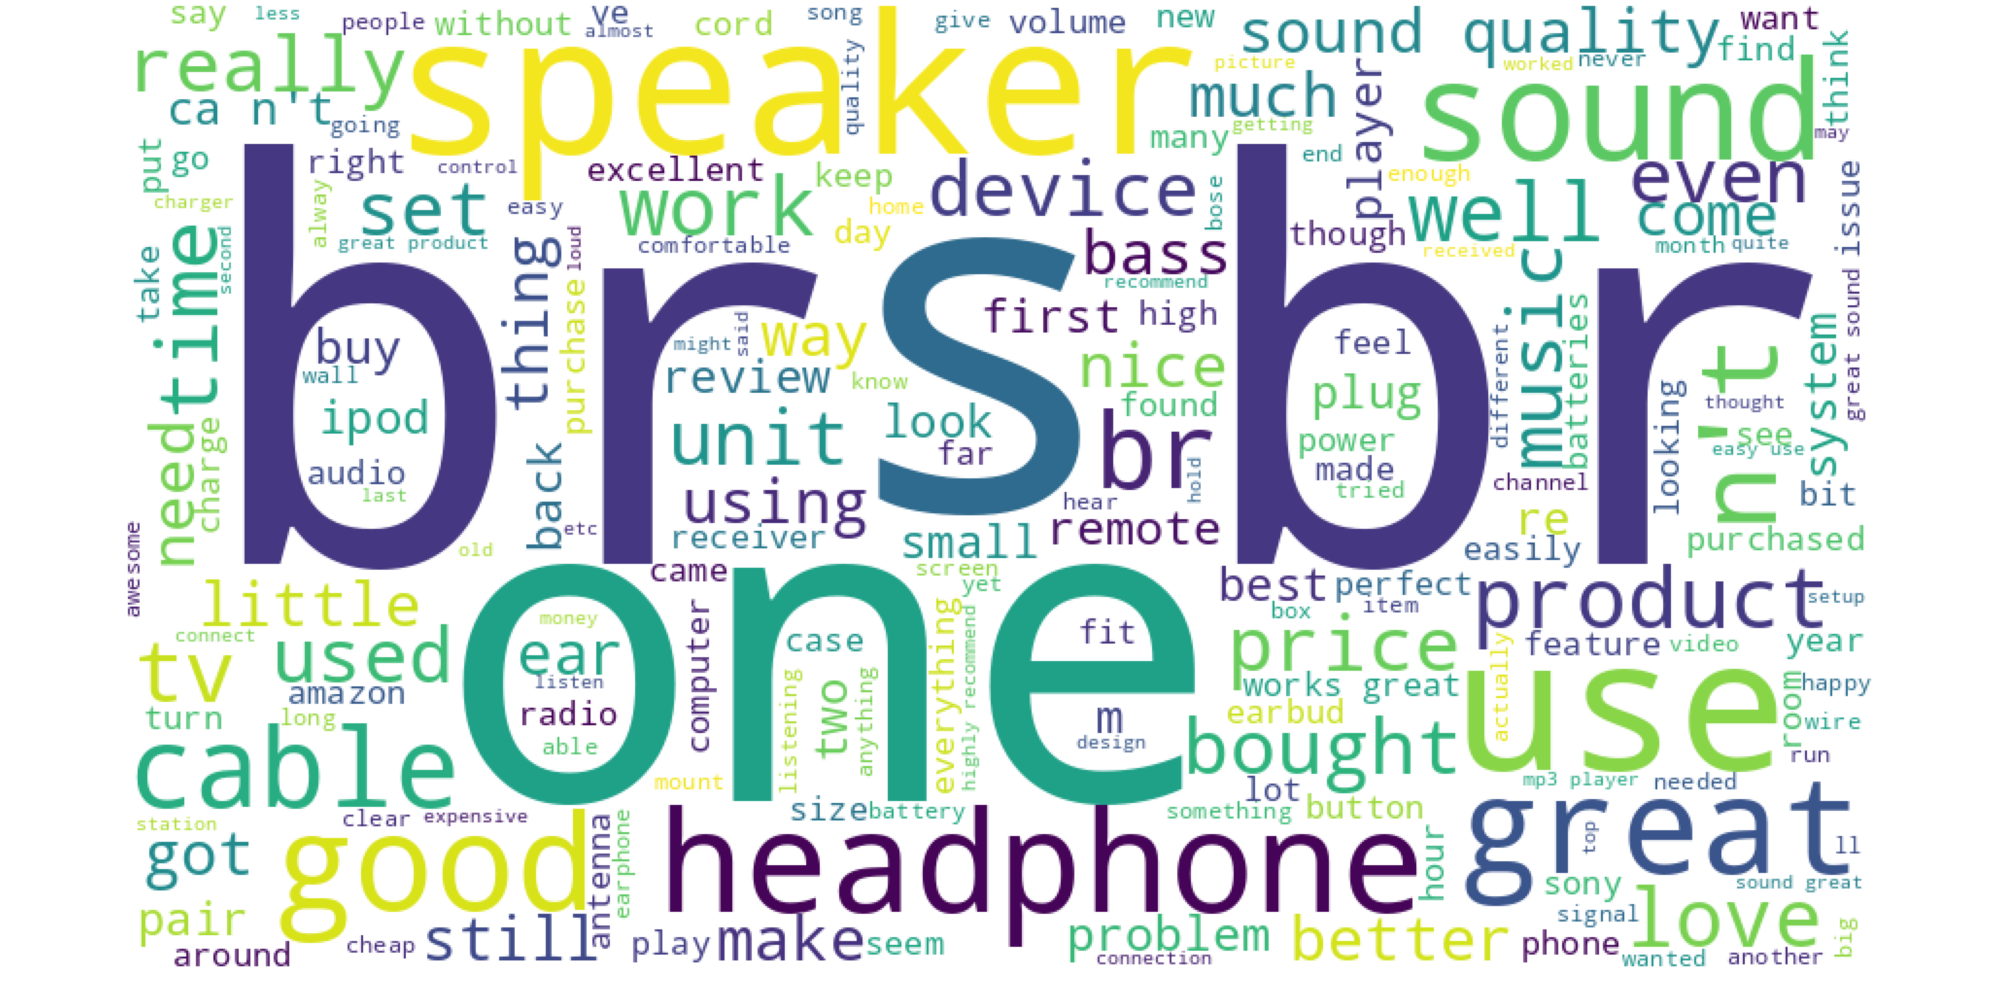

In [74]:
plt.figure(figsize=(20,10), facecolor='None')
plt.imshow(pos_wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()
%matplot plt

#### Wordcloud for NEGATIVE words:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

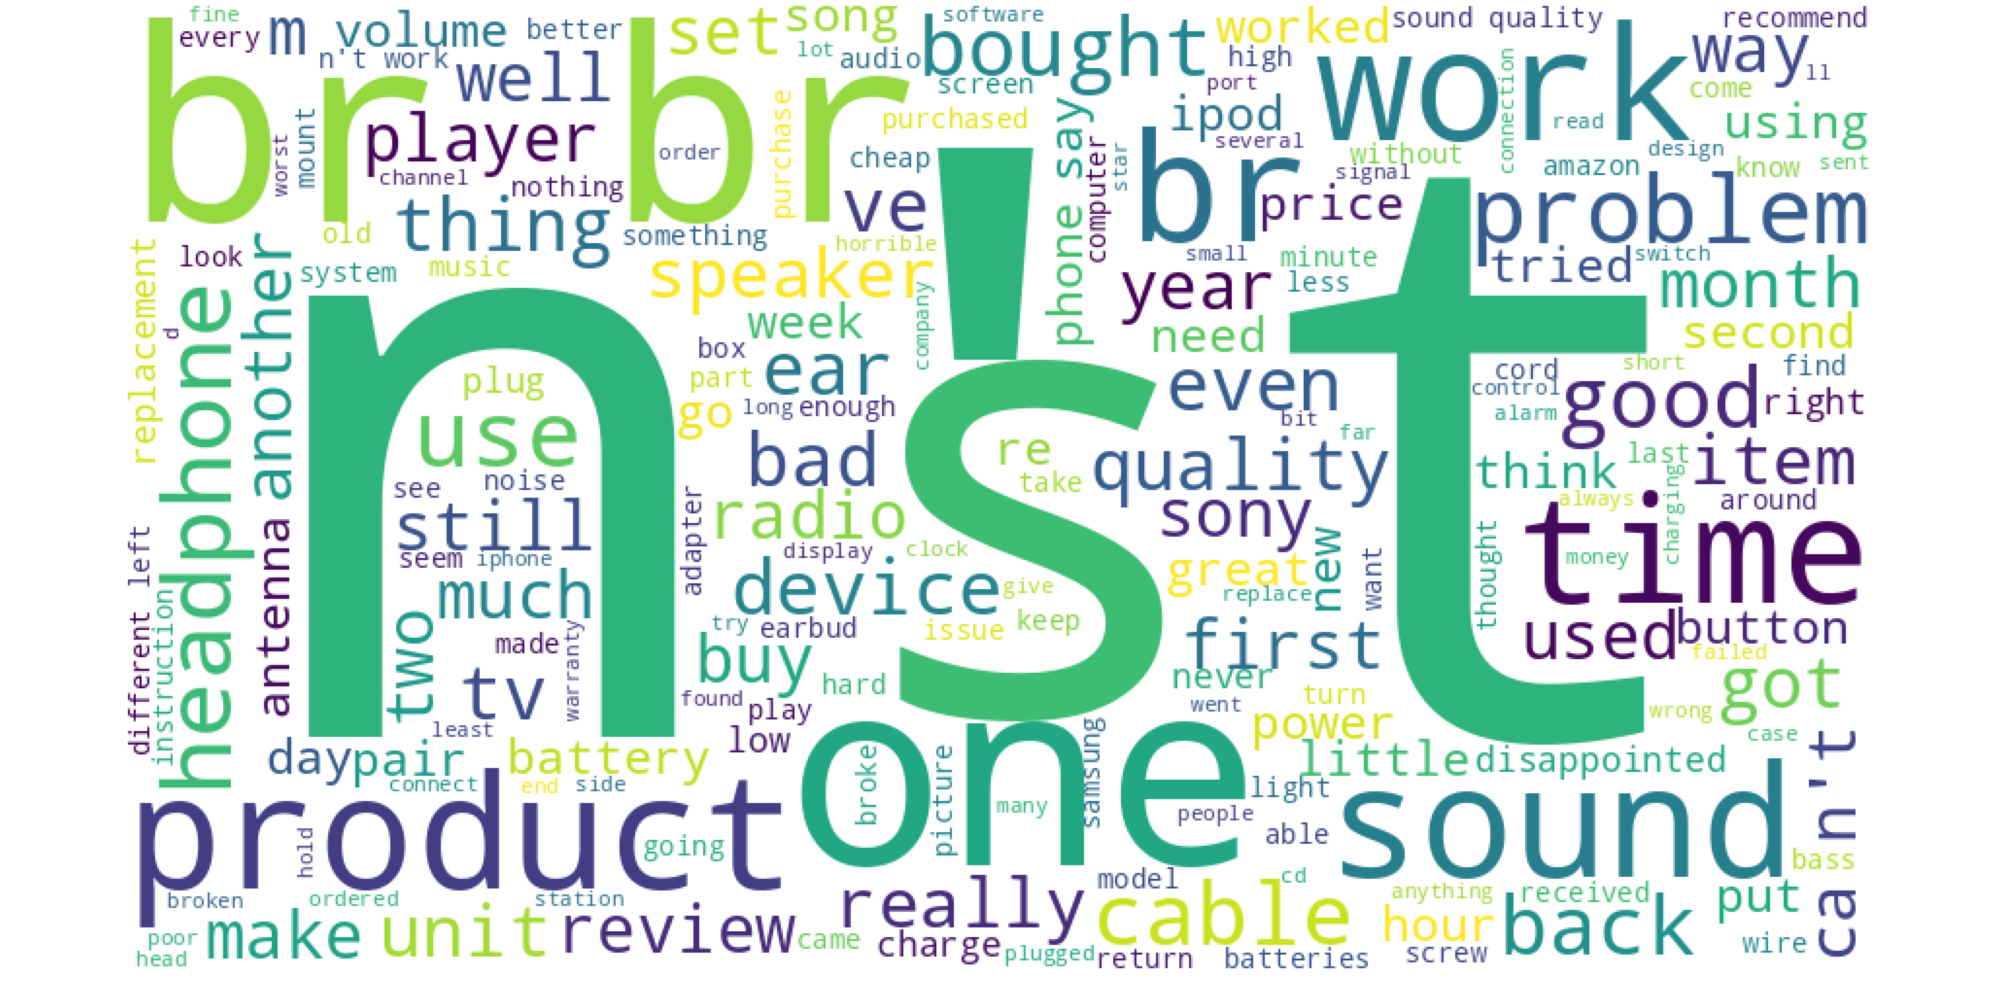

In [75]:
plt.figure(figsize=(20,10), facecolor='None')
plt.imshow(neg_wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()
%matplot plt

#### Wordcloud for NEUTRAL words:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

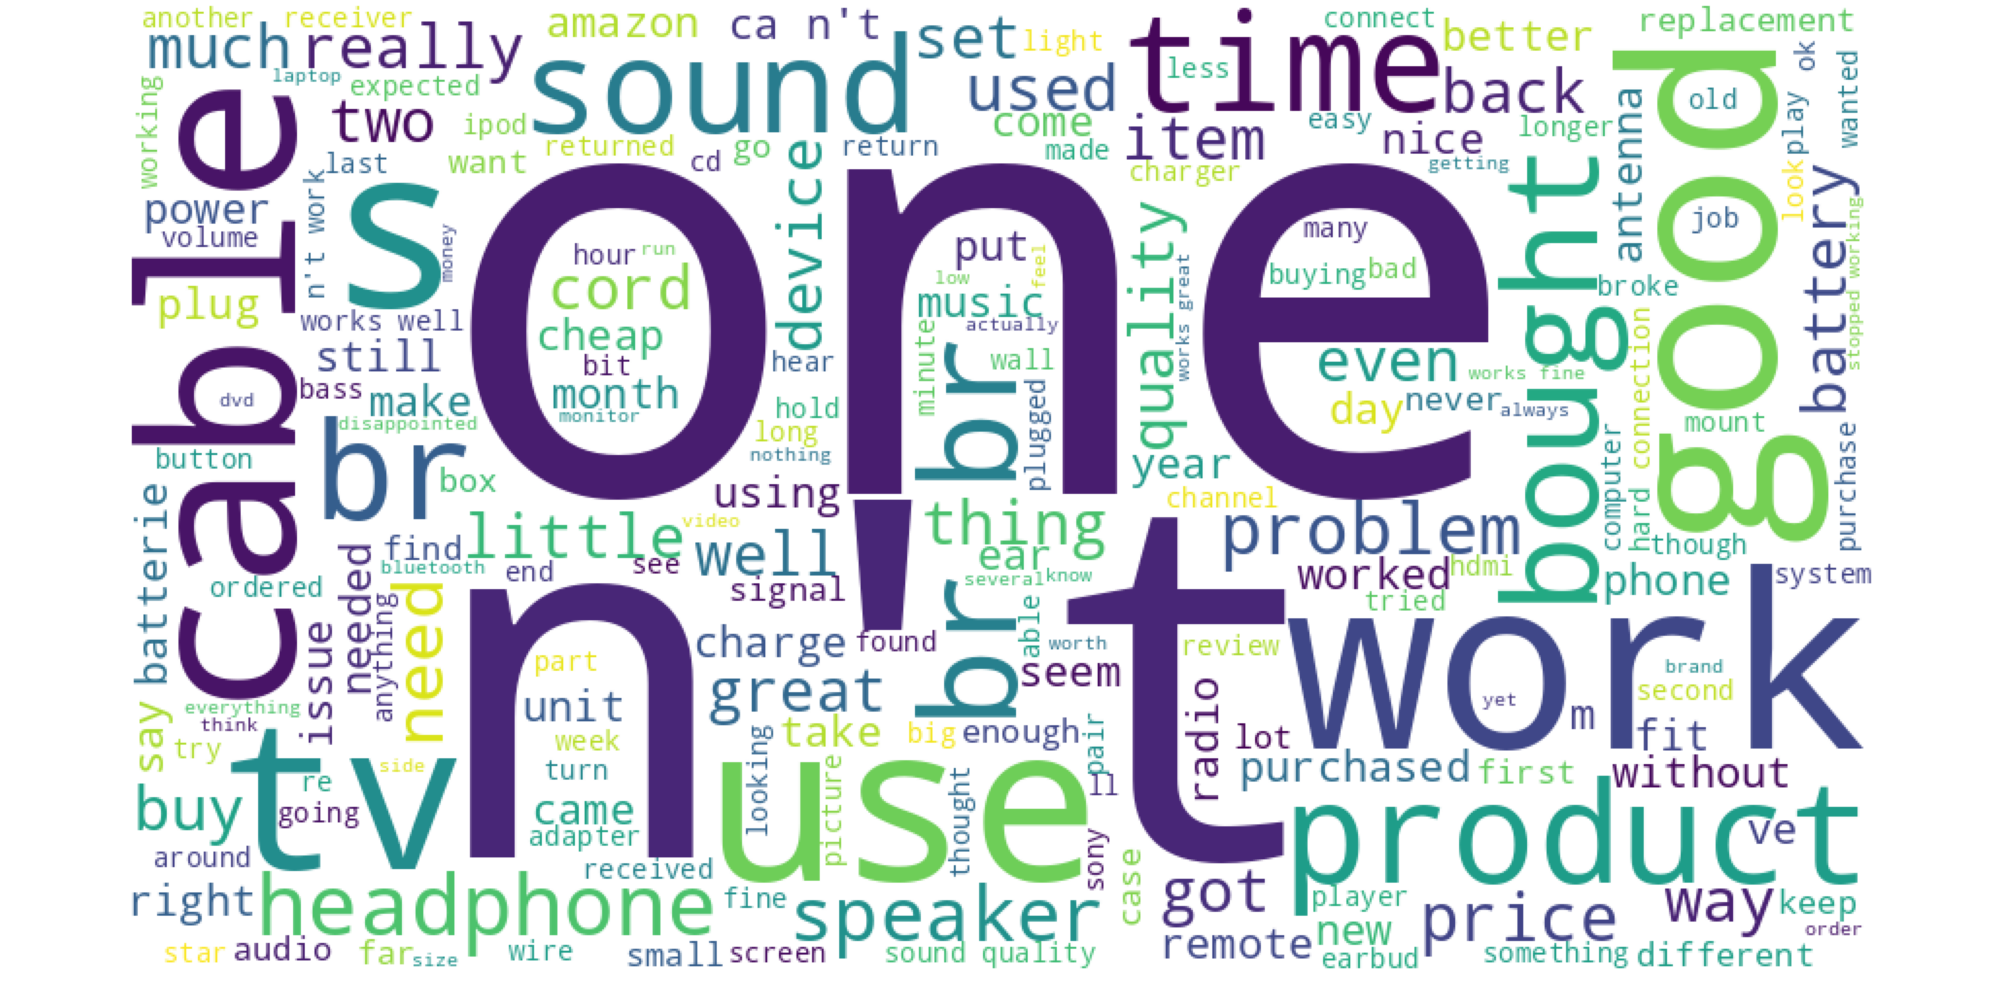

In [76]:
plt.figure(figsize=(20,10), facecolor='None')
plt.imshow(neu_wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()
%matplot plt

In [77]:
#Clears the entire current figure with all its axes
plt.clf()
plt.cla()
plt.close()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Part III: Conclusion